In [5]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [6]:
#Load the Dataset
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Explore and Clean the Data
print(df.info())
print(df.describe())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

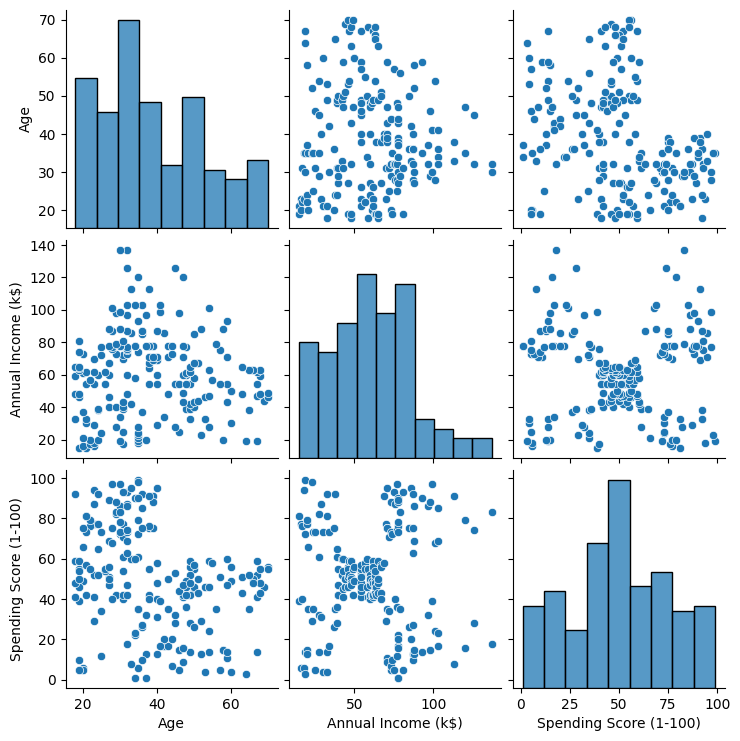

In [8]:
#Typical columns: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

#Optional visualization:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()


In [9]:
#Feature Selection and Scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


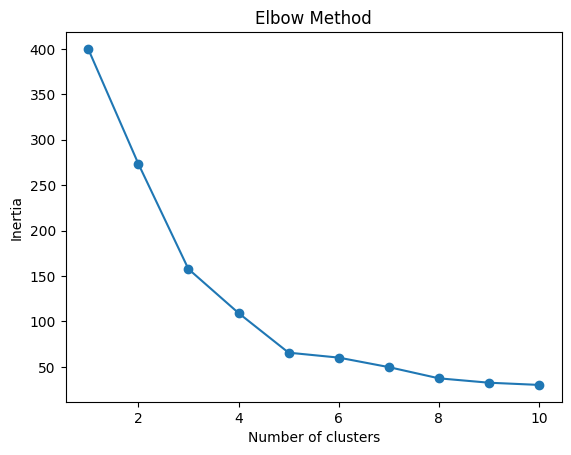

<Figure size 640x480 with 0 Axes>

In [19]:
#Find the Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [11]:
#Train the K-Means Model
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


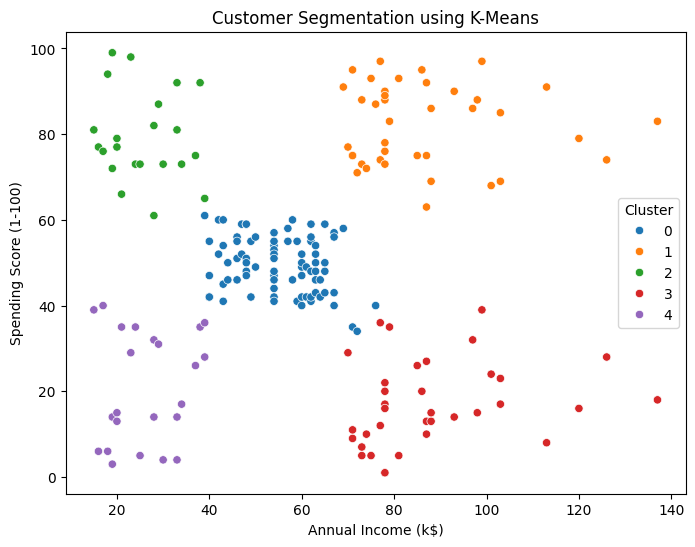

<Figure size 640x480 with 0 Axes>

In [12]:
#Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='tab10'
)
plt.title('Customer Segmentation using K-Means')
plt.show()


In [13]:
#Interpret Results
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
#Typical insight:

#Cluster 0 = high income, high spending (VIP customers)

#Cluster 1 = low income, low spending

#Cluster 2 = moderate income, high spending (potential growth)

In [14]:
#Bonus Ideas (Optional for Badge
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
df['DBSCAN_Cluster'] = db.labels_


In [15]:
#Or compute average spending per cluster:
df.groupby('Cluster')['Spending Score (1-100)'].mean()


Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64